Datasoubrce link https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data

The dataset contains apartment offers from the 15 largest cities in Poland (Warsaw, Lodz, Krakow, Wroclaw, Poznan, Gdansk, Szczecin, Bydgoszcz, Lublin, Katowice, Bialystok, Czestochowa). The data comes from local websites with apartments for sale. To fully capture the neighborhood of each apartment better, each offer was extended by data from the Open Street Map with distances to points of interest (POI). The data is collected monthly and covers timespan between September 2023 and October 2023

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# for OLS method
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Read data

In [2]:
data = pd.read_excel("homeprices_poland.xlsx")
data.head(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [3]:
data.columns

Index(['id', 'city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')

### Drop id, latitude, longitude, poicount

In [4]:
# Drop the specified columns
data = data.drop(columns=['id', 'latitude', 'longitude', 'poiCount'])
data.head(5)

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,blockOfFlats,63.00,3,4.0,10.0,1980.0,6.53,0.118,1.389,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,szczecin,blockOfFlats,36.00,2,8.0,10.0,NaN,2.15,0.273,0.492,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,szczecin,tenement,73.02,3,2.0,3.0,NaN,3.24,0.275,0.672,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,szczecin,tenement,87.60,3,2.0,3.0,NaN,2.27,0.175,0.259,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,szczecin,blockOfFlats,66.00,3,1.0,3.0,NaN,4.07,0.218,1.690,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [5]:
data.describe(include = "all")

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
count,52592,40942,52592.000000,52592.000000,43065.000000,51842.000000,43467.000000,52592.000000,52542.000000,52340.000000,...,52513.000000,52592,32087,12773,52592,52592,49904,52592,52592,5.259200e+04
unique,15,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,2,2,2,2,2,2,2,NaN
top,warszawa,blockOfFlats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,condominium,brick,premium,no,yes,no,no,no,NaN
freq,15465,24674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47156,24708,7020,38788,29972,26500,47127,28532,NaN
mean,NaN,NaN,58.830142,2.681929,3.313108,5.229004,1984.493961,4.359606,0.417065,0.989992,...,0.366438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.074146e+05
std,NaN,NaN,21.250642,0.910070,2.514338,3.283571,33.981805,2.876144,0.478467,0.910303,...,0.476065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.495542e+05
min,NaN,NaN,25.000000,1.000000,1.000000,1.000000,1850.000000,0.020000,0.004000,0.001000,...,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+05
25%,NaN,NaN,44.360000,2.000000,2.000000,3.000000,1965.000000,2.010000,0.175000,0.360000,...,0.145000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.680000e+05
50%,NaN,NaN,55.000000,3.000000,3.000000,4.000000,1991.000000,3.960000,0.290000,0.685000,...,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.390000e+05
75%,NaN,NaN,69.000000,3.000000,4.000000,6.000000,2014.000000,6.140000,0.468000,1.270000,...,0.407000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000e+05


In [6]:
data.isnull().sum()

city                        0
type                    11650
squareMeters                0
rooms                       0
floor                    9527
floorCount                750
buildYear                9125
centreDistance              0
schoolDistance             50
clinicDistance            252
postOfficeDistance         73
kindergartenDistance       49
restaurantDistance        154
collegeDistance          1572
pharmacyDistance           79
ownership                   0
buildingMaterial        20505
condition               39819
hasParkingSpace             0
hasBalcony                  0
hasElevator              2688
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64

In [7]:
data = data.drop(columns=['buildingMaterial', 'condition'])

In [8]:
data = data.dropna(subset=['type', 'floor', 'buildYear', 'hasElevator'])

In [9]:
data.isnull().sum()

city                      0
type                      0
squareMeters              0
rooms                     0
floor                     0
floorCount                0
buildYear                 0
centreDistance            0
schoolDistance           25
clinicDistance          145
postOfficeDistance       42
kindergartenDistance     25
restaurantDistance       97
collegeDistance         805
pharmacyDistance         49
ownership                 0
hasParkingSpace           0
hasBalcony                0
hasElevator               0
hasSecurity               0
hasStorageRoom            0
price                     0
dtype: int64

In [10]:
# List of distance columns
columns = ['centreDistance', 'schoolDistance', 'clinicDistance', 
                    'postOfficeDistance', 'kindergartenDistance', 
                    'restaurantDistance', 'collegeDistance', 'pharmacyDistance']

# Filling null values with mean
for column in columns:
    data[column].fillna(data[column].mean(), inplace=True)

In [11]:
data.isnull().sum()

city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
centreDistance          0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
dtype: int64

In [12]:
data.describe(include = "all")

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
count,28067,28067,28067.000000,28067.000000,28067.000000,28067.000000,28067.000000,28067.000000,28067.000000,28067.000000,...,28067.000000,28067.000000,28067.000000,28067,28067,28067,28067,28067,28067,2.806700e+04
unique,15,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,warszawa,blockOfFlats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,condominium,no,yes,yes,no,yes,NaN
freq,9076,17171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24881,19461,19236,15145,24617,14195,NaN
mean,NaN,NaN,59.761750,2.711726,3.349663,5.587095,1984.571882,4.428681,0.410448,0.957858,...,0.341617,1.446784,0.352099,NaN,NaN,NaN,NaN,NaN,NaN,7.468827e+05
std,NaN,NaN,21.274589,0.905587,2.537697,3.426738,33.555336,2.855145,0.470464,0.886544,...,0.474268,1.076313,0.463569,NaN,NaN,NaN,NaN,NaN,NaN,3.596965e+05
min,NaN,NaN,25.000000,1.000000,1.000000,1.000000,1851.000000,0.020000,0.004000,0.004000,...,0.001000,0.013000,0.001000,NaN,NaN,NaN,NaN,NaN,NaN,1.512000e+05
25%,NaN,NaN,45.400000,2.000000,2.000000,3.000000,1968.000000,2.090000,0.174000,0.354000,...,0.115000,0.599500,0.143000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+05
50%,NaN,NaN,56.000000,3.000000,3.000000,4.000000,1990.000000,4.050000,0.288000,0.656000,...,0.227000,1.182000,0.236000,NaN,NaN,NaN,NaN,NaN,NaN,6.700000e+05
75%,NaN,NaN,70.000000,3.000000,4.000000,7.000000,2013.000000,6.200000,0.462500,1.214000,...,0.401000,2.046000,0.392500,NaN,NaN,NaN,NaN,NaN,NaN,8.910000e+05


In [13]:
# Get the count of houses per city
houses_per_city = data['city'].value_counts()

# Display the result
print(houses_per_city)

warszawa       9076
krakow         4309
wroclaw        2959
gdansk         2788
lodz           2152
gdynia         1144
bydgoszcz      1029
lublin          968
poznan          900
szczecin        830
katowice        554
radom           501
bialystok       497
rzeszow         285
czestochowa      75
Name: city, dtype: int64


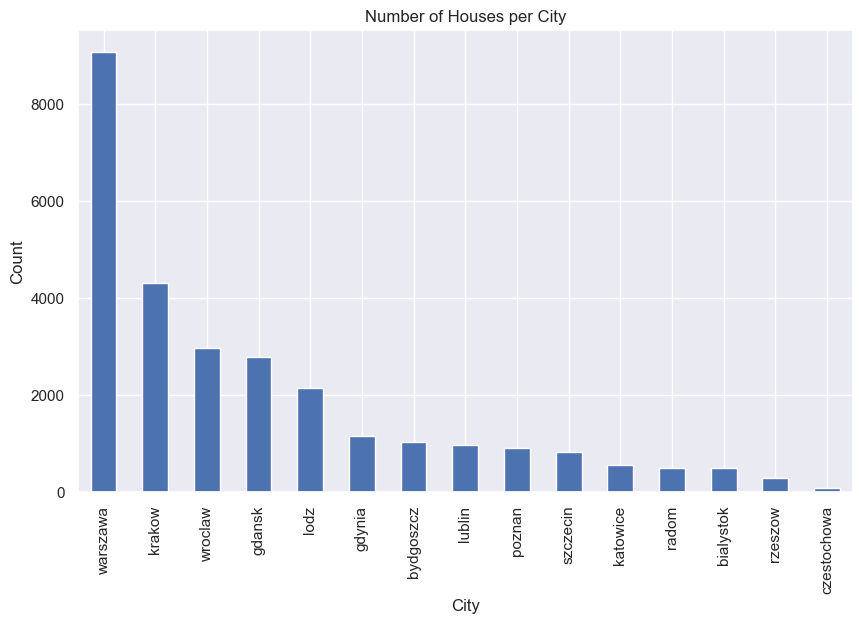

In [14]:
# Plotting
houses_per_city.plot(kind='bar', figsize=(10,6))
plt.title('Number of Houses per City')
plt.ylabel('Count')
plt.xlabel('City')
plt.show()

In [15]:
# Keeping only rows with specified cities
cities_to_keep = ['warszawa', 'krakow', 'gdansk', 'wroclaw', 'lodz']
data = data[data['city'].isin(cities_to_keep)]

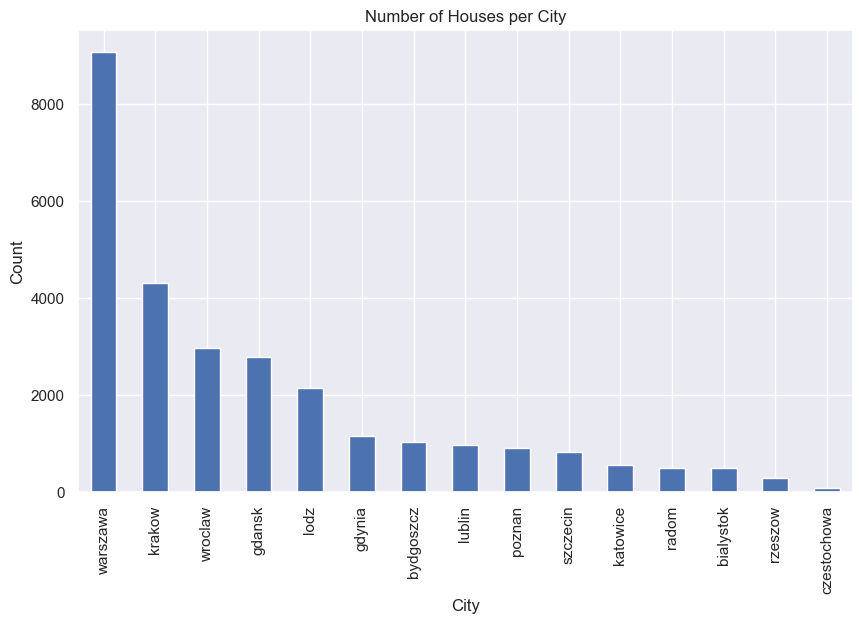

In [16]:
# Plotting
houses_per_city.plot(kind='bar', figsize=(10,6))
plt.title('Number of Houses per City')
plt.ylabel('Count')
plt.xlabel('City')
plt.show()

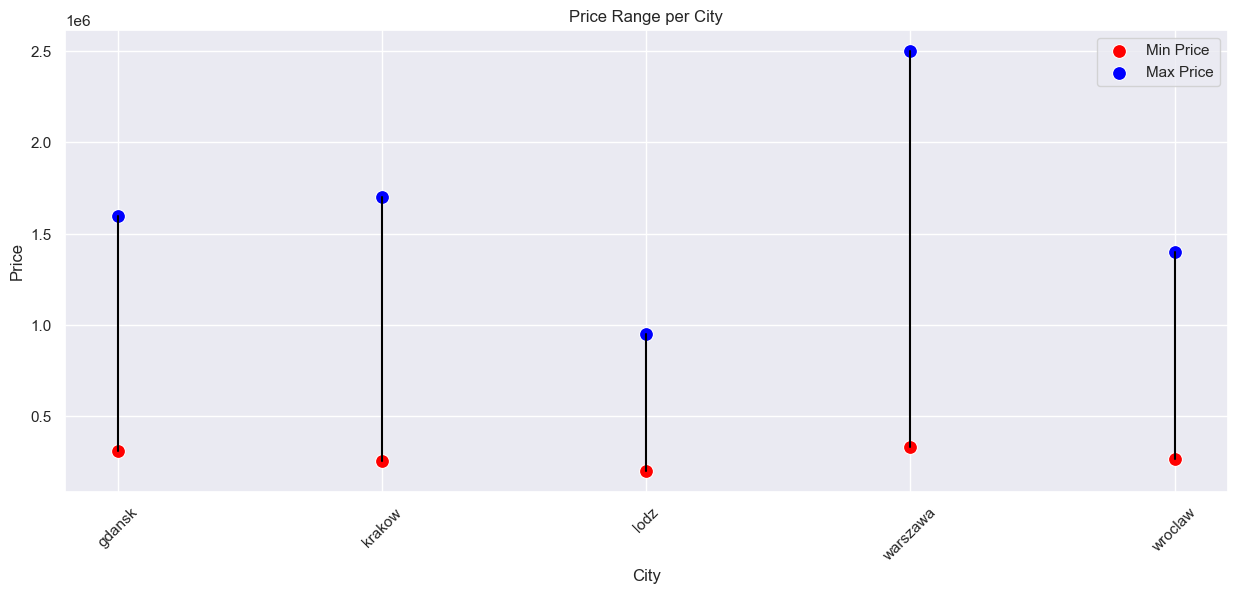

In [19]:
# Calculating min, max for each city
city_price_stats = data.groupby('city')['price'].agg(['min', 'max']).reset_index()

# Plotting
plt.figure(figsize=(15,6))

# Min Price
sns.scatterplot(x='city', y='min', data=city_price_stats, color='red', label='Min Price', s=100)

# Max Price
sns.scatterplot(x='city', y='max', data=city_price_stats, color='blue', label='Max Price', s=100)

# Line connecting Min and Max Price
for i in range(len(city_price_stats)):
    plt.plot([city_price_stats['city'][i], city_price_stats['city'][i]], 
             [city_price_stats['min'][i], city_price_stats['max'][i]], color='black')

plt.title('Price Range per City')
plt.ylabel('Price')
plt.xlabel('City')
plt.legend()
plt.xticks(rotation=45)
plt.show()


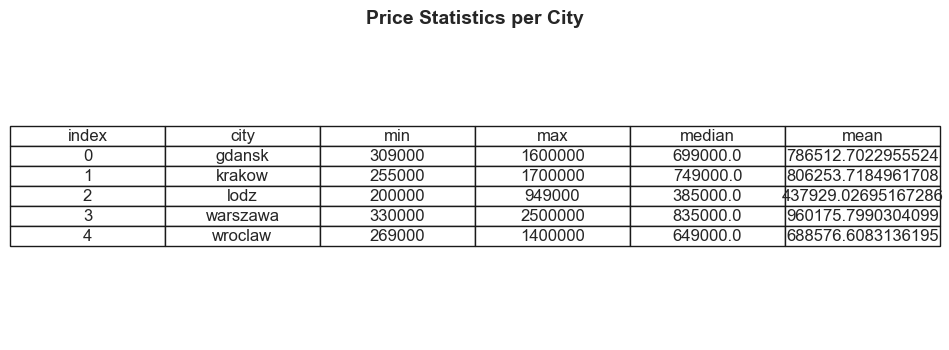

In [31]:
# Calculating median price for each city
city_median_price = data.groupby('city')['price'].mean().reset_index()

# Adding the median column to the city_price_stats DataFrame
city_price_stats['mean'] = city_median_price['price']

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')  # Hide axes
table = ax.table(cellText=city_price_stats.values, colLabels=city_price_stats.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Price Statistics per City', fontsize=14, weight='bold')
plt.show()


In [32]:
# Displaying the min, max, and average price per city in a table format
display(city_price_stats.set_index('city'))

,index,min,max,median,mean
city,,,,,
gdansk,0,309000,1600000,699000.0,786512.702296
krakow,1,255000,1700000,749000.0,806253.718496
lodz,2,200000,949000,385000.0,437929.026952
warszawa,3,330000,2500000,835000.0,960175.799030
wroclaw,4,269000,1400000,649000.0,688576.608314


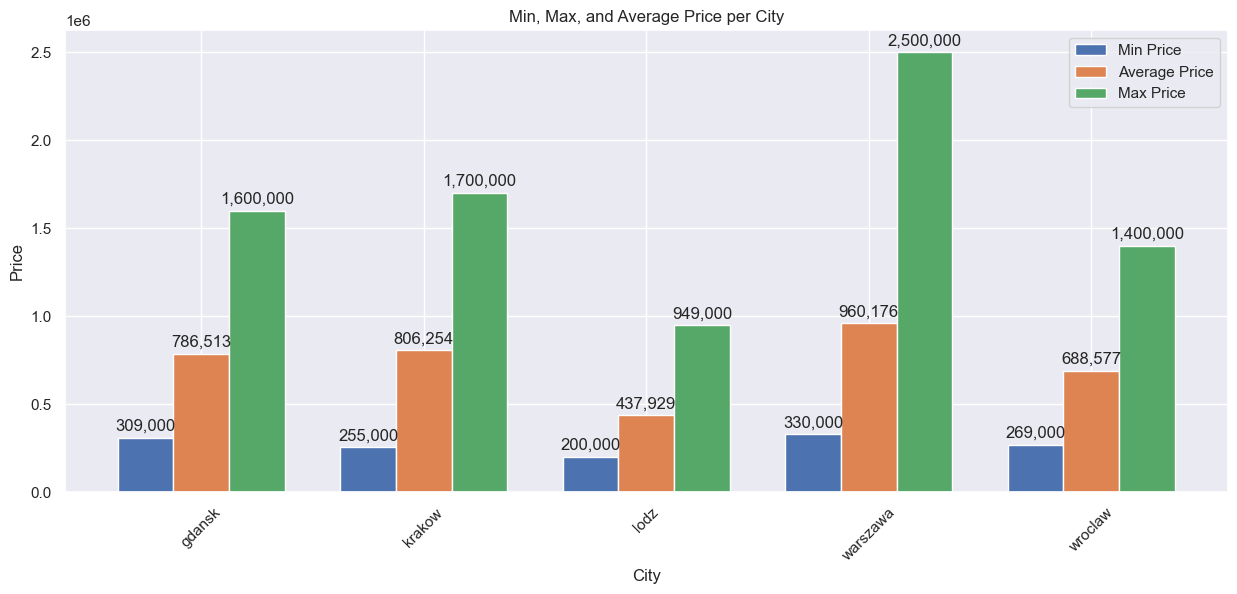

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Set the positions and width for the bars
positions = np.arange(len(city_price_stats['city']))
width = 0.25  # the width of the bars

# Create the figure and the axes (subplots)
fig, ax = plt.subplots(figsize=(15,6))

# Plotting
rects1 = ax.bar(positions - width, city_price_stats['min'], width, label='Min Price')
rects2 = ax.bar(positions, city_price_stats['mean'], width, label='Average Price')
rects3 = ax.bar(positions + width, city_price_stats['max'], width, label='Max Price')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('City')
ax.set_ylabel('Price')
ax.set_title('Min, Max, and Average Price per City')
ax.set_xticks(positions)
ax.set_xticklabels(city_price_stats['city'])
ax.legend()

# Autolabel function to display the label on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.xticks(rotation=45)
plt.show()


In [34]:
data.head()

,index,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,1383,krakow,apartmentBuilding,42.00,2,2.0,3.0,2017.0,5.24,0.501,...,0.536,3.548,0.586,condominium,no,yes,yes,yes,no,600000
1,1388,krakow,blockOfFlats,75.93,3,1.0,5.0,2014.0,3.59,0.478,...,0.541,1.816,0.536,condominium,no,yes,yes,no,no,799000
2,1389,krakow,apartmentBuilding,60.00,3,2.0,2.0,2022.0,8.76,0.565,...,0.624,2.161,0.825,condominium,yes,yes,no,no,yes,549000
3,1390,krakow,apartmentBuilding,48.00,2,3.0,7.0,2012.0,7.35,0.211,...,0.364,1.460,0.067,condominium,yes,yes,yes,yes,no,539000
4,1392,krakow,blockOfFlats,45.00,2,3.0,10.0,1980.0,5.17,0.453,...,0.229,1.067,0.226,condominium,yes,yes,yes,no,yes,450000


In [35]:
# Displaying unique values and their counts in the 'ownership' column
ownership_counts = data['ownership'].value_counts()
print(ownership_counts)

condominium    19143
cooperative     2140
udziaÅ‚            1
Name: ownership, dtype: int64


In [36]:
data = data[data['ownership'] != 'udziaÅ‚']

In [37]:
# Define the mapping
mapping = {'yes': 1, 'no': 0}

# Convert categorical to numerical
data['hasParkingSpace'] = data['hasParkingSpace'].replace(mapping)
data['hasBalcony'] = data['hasBalcony'].replace(mapping)
data['hasElevator'] = data['hasElevator'].replace(mapping)
data['hasSecurity'] = data['hasSecurity'].replace(mapping)
data['hasStorageRoom'] = data['hasStorageRoom'].replace(mapping)

In [38]:
data.head()

,index,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,1383,krakow,apartmentBuilding,42.00,2,2.0,3.0,2017.0,5.24,0.501,...,0.536,3.548,0.586,condominium,0,1,1,1,0,600000
1,1388,krakow,blockOfFlats,75.93,3,1.0,5.0,2014.0,3.59,0.478,...,0.541,1.816,0.536,condominium,0,1,1,0,0,799000
2,1389,krakow,apartmentBuilding,60.00,3,2.0,2.0,2022.0,8.76,0.565,...,0.624,2.161,0.825,condominium,1,1,0,0,1,549000
3,1390,krakow,apartmentBuilding,48.00,2,3.0,7.0,2012.0,7.35,0.211,...,0.364,1.460,0.067,condominium,1,1,1,1,0,539000
4,1392,krakow,blockOfFlats,45.00,2,3.0,10.0,1980.0,5.17,0.453,...,0.229,1.067,0.226,condominium,1,1,1,0,1,450000


In [39]:
# Create dummy variables for 'city' and 'type' columns
data = pd.get_dummies(data, columns=['city', 'type'], prefix=['city', 'type'])

In [40]:
# Drop the 'price' column and keep it in a separate variable
price_col = data.pop('price')

# Add the 'price' column back to the end of the DataFrame
data['price'] = price_col
data.head()

,index,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,postOfficeDistance,...,hasStorageRoom,city_gdansk,city_krakow,city_lodz,city_warszawa,city_wroclaw,type_apartmentBuilding,type_blockOfFlats,type_tenement,price
0,1383,42.00,2,2.0,3.0,2017.0,5.24,0.501,0.350,0.601,...,0,0,1,0,0,0,1,0,0,600000
1,1388,75.93,3,1.0,5.0,2014.0,3.59,0.478,0.993,0.970,...,0,0,1,0,0,0,0,1,0,799000
2,1389,60.00,3,2.0,2.0,2022.0,8.76,0.565,1.752,0.941,...,1,0,1,0,0,0,1,0,0,549000
3,1390,48.00,2,3.0,7.0,2012.0,7.35,0.211,0.221,0.112,...,0,0,1,0,0,0,1,0,0,539000
4,1392,45.00,2,3.0,10.0,1980.0,5.17,0.453,0.261,0.267,...,1,0,1,0,0,0,0,1,0,450000


In [41]:
import warnings
warnings.filterwarnings('ignore')

data.corr()

,index,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,postOfficeDistance,...,hasStorageRoom,city_gdansk,city_krakow,city_lodz,city_warszawa,city_wroclaw,type_apartmentBuilding,type_blockOfFlats,type_tenement,price
index,1.000000,0.024604,0.008476,0.027589,0.040144,0.005492,0.073492,-0.017527,-0.030764,0.025329,...,-0.020768,-0.095473,-0.239637,0.005810,0.282900,-0.038049,0.041653,-0.039232,0.003633,0.109281
squareMeters,0.024604,1.000000,0.830098,-0.059047,-0.133283,-0.001886,0.067625,0.054289,-0.009761,0.023672,...,-0.037062,0.001956,-0.021613,-0.057854,0.060416,-0.012755,0.082540,-0.146766,0.098297,0.688313
rooms,0.008476,0.830098,1.000000,-0.034697,-0.081446,0.007289,0.080323,0.057746,0.013754,0.017141,...,0.018500,0.019095,0.000289,-0.054056,0.029690,-0.014294,0.018849,-0.037052,0.027114,0.534340
floor,0.027589,-0.059047,-0.034697,1.000000,0.672252,0.077058,-0.043732,-0.143688,-0.146973,-0.087736,...,0.003058,-0.036157,-0.060350,-0.029956,0.119226,-0.038978,0.036448,0.096129,-0.168994,0.029546
floorCount,0.040144,-0.133283,-0.081446,0.672252,1.000000,0.139225,-0.075770,-0.186809,-0.209473,-0.103013,...,-0.013901,-0.043392,-0.089507,-0.058433,0.177526,-0.056583,0.088777,0.119447,-0.260252,0.022830
buildYear,0.005492,-0.001886,0.007289,0.077058,0.139225,1.000000,0.365245,0.348118,0.234788,0.297657,...,-0.413431,0.004430,0.042180,-0.106344,0.066398,-0.055553,0.482049,0.154938,-0.761637,0.093191
centreDistance,0.073492,0.067625,0.080323,-0.043732,-0.075770,0.365245,1.000000,0.344263,0.451024,0.305529,...,-0.117105,-0.009247,-0.142456,-0.117568,0.319594,-0.179940,0.049285,0.226690,-0.356143,-0.059146
schoolDistance,-0.017527,0.054289,0.057746,-0.143688,-0.186809,0.348118,0.344263,1.000000,0.435907,0.460729,...,-0.213752,0.084092,0.022998,-0.075497,-0.053782,0.033949,0.144607,0.018858,-0.192026,-0.024948
clinicDistance,-0.030764,-0.009761,0.013754,-0.146973,-0.209473,0.234788,0.451024,0.435907,1.000000,0.347855,...,-0.097796,0.110496,-0.078015,0.044378,-0.106273,0.096089,0.005357,0.146089,-0.198995,-0.198281
postOfficeDistance,0.025329,0.023672,0.017141,-0.087736,-0.103013,0.297657,0.305529,0.460729,0.347855,1.000000,...,-0.186058,-0.020068,-0.079464,0.024670,0.009385,0.076942,0.173742,-0.023563,-0.169715,-0.040367


In [42]:
data.columns

Index(['index', 'squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
       'centreDistance', 'schoolDistance', 'clinicDistance',
       'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
       'collegeDistance', 'pharmacyDistance', 'ownership', 'hasParkingSpace',
       'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom',
       'city_gdansk', 'city_krakow', 'city_lodz', 'city_warszawa',
       'city_wroclaw', 'type_apartmentBuilding', 'type_blockOfFlats',
       'type_tenement', 'price'],
      dtype='object')

In [43]:
data = data[['squareMeters', 'rooms', 'hasParkingSpace', 'hasElevator', 'type_apartmentBuilding','price']]
data

,squareMeters,rooms,hasParkingSpace,hasElevator,type_apartmentBuilding,price
0,42.00,2,0,1,1,600000
1,75.93,3,0,1,0,799000
2,60.00,3,1,0,1,549000
3,48.00,2,1,1,1,539000
4,45.00,2,1,1,0,450000
...,...,...,...,...,...,...
21279,80.00,3,1,1,0,1500000
21280,32.90,1,1,0,0,499000
21281,70.00,2,0,1,0,910000
21282,67.00,2,0,1,0,1005000


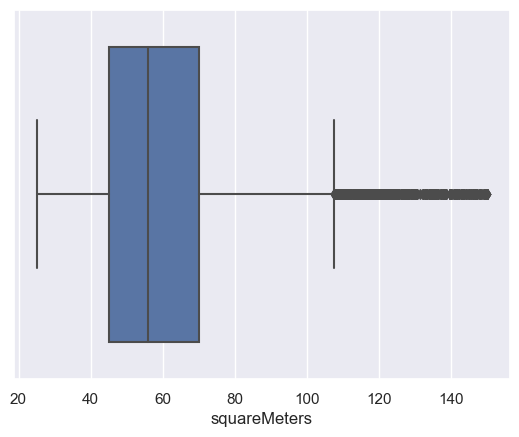

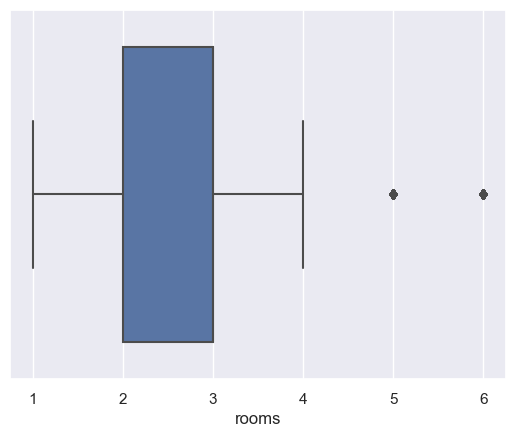

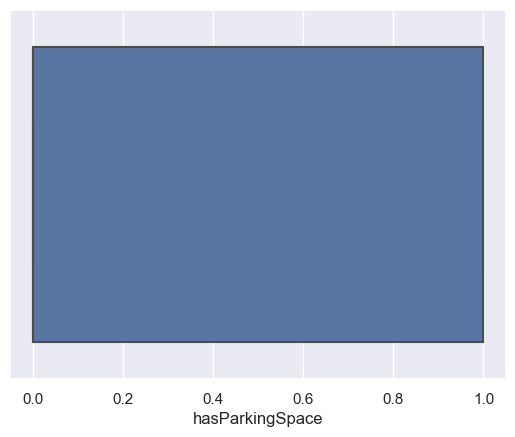

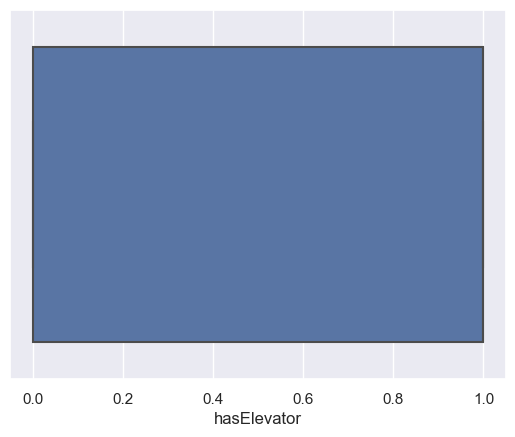

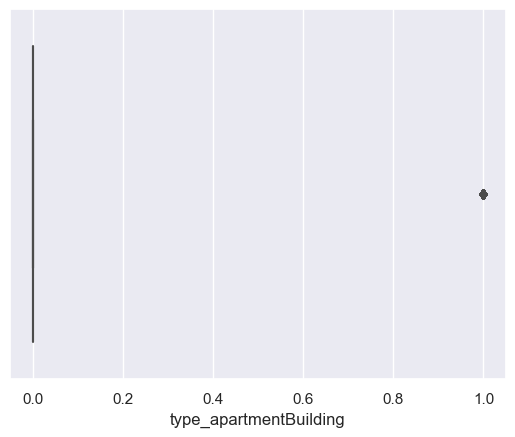

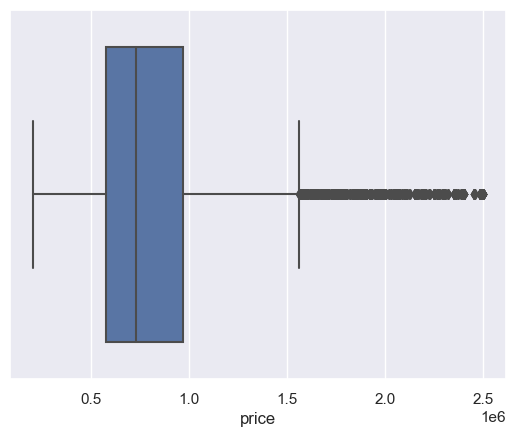

In [44]:
for i in data.columns:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [45]:
q1 = data[['squareMeters', 'price']].quantile(0.25)
q3 = data[['squareMeters', 'price']].quantile(0.75)
IQR = q3 - q1

Lower = q1 - 1.5 * IQR
Upper = q3 + 1.5 * IQR

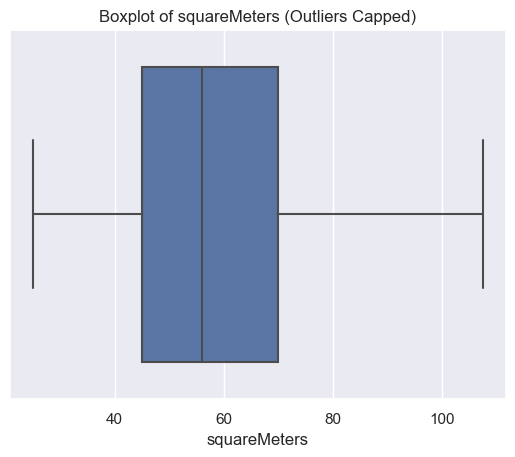

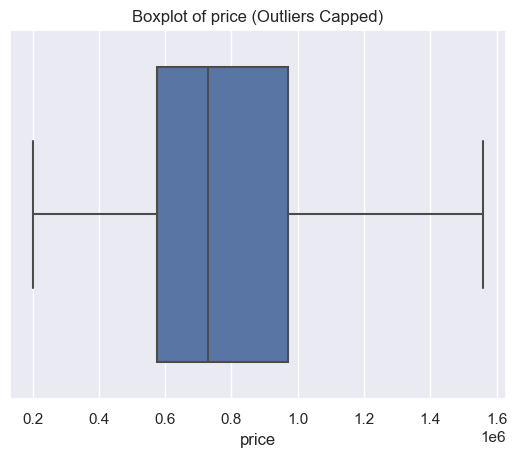

In [46]:
for col in ['squareMeters', 'price']:
    data[col] = np.where(data[col] > Upper[col], Upper[col], data[col])
    data[col] = np.where(data[col] < Lower[col], Lower[col], data[col])
    sns.boxplot(data=data, x=data[col])
    plt.title(f'Boxplot of {col} (Outliers Capped)')
    plt.show()

In [47]:
data.columns

Index(['squareMeters', 'rooms', 'hasParkingSpace', 'hasElevator',
       'type_apartmentBuilding', 'price'],
      dtype='object')

In [48]:
X = data[['squareMeters', 'rooms', 'hasParkingSpace', 'hasElevator', 'type_apartmentBuilding']]
y = data[['price']]

In [49]:
X

,squareMeters,rooms,hasParkingSpace,hasElevator,type_apartmentBuilding
0,42.00,2,0,1,1
1,75.93,3,0,1,0
2,60.00,3,1,0,1
3,48.00,2,1,1,1
4,45.00,2,1,1,0
...,...,...,...,...,...
21279,80.00,3,1,1,0
21280,32.90,1,1,0,0
21281,70.00,2,0,1,0
21282,67.00,2,0,1,0


In [50]:
y

,price
0,600000.0
1,799000.0
2,549000.0
3,539000.0
4,450000.0
...,...
21279,1500000.0
21280,499000.0
21281,910000.0
21282,1005000.0


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)

In [53]:
reg = DecisionTreeRegressor()

In [54]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred = reg.predict(X_test)

In [56]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 119634.84127956627
MSE is 36209560773.17352
RMSE is 190288.09939976153
R2 score is 0.6614425817228573


In [57]:
regRF = RandomForestRegressor(n_estimators = 10)

In [58]:
regRF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [59]:
y_predRF = regRF.predict(X_test)

In [60]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_predRF)
mse = metrics.mean_squared_error(y_test, y_predRF)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_predRF)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 127917.66432416938
MSE is 34125927394.898655
RMSE is 184732.04214455772
R2 score is 0.6809244401636105


In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)    

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [62]:
rf_random = RandomizedSearchCV(estimator = regRF, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [63]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70}

In [64]:
optimizedmodel = RandomForestRegressor(n_estimators = 1200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 20)

In [65]:
optimizedmodel.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=1200)

In [66]:
y_pred = optimizedmodel.predict(X_test)

In [67]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 128635.19524470871
MSE is 33501315313.278263
RMSE is 183033.64530402125
R2 score is 0.6867645290589937


In [68]:
data

,squareMeters,rooms,hasParkingSpace,hasElevator,type_apartmentBuilding,price
0,42.00,2,0,1,1,600000.0
1,75.93,3,0,1,0,799000.0
2,60.00,3,1,0,1,549000.0
3,48.00,2,1,1,1,539000.0
4,45.00,2,1,1,0,450000.0
...,...,...,...,...,...,...
21279,80.00,3,1,1,0,1500000.0
21280,32.90,1,1,0,0,499000.0
21281,70.00,2,0,1,0,910000.0
21282,67.00,2,0,1,0,1005000.0


In [94]:
new_data_dict = {
    'squareMeters': [30.0, 70.0, 45.0, 65.0, 80.0],
    'rooms': [1, 4, 2, 3, 4],
    'hasParkingSpace': [1, 0, 1, 1, 0],
    'hasElevator': [1, 1, 0, 1, 1],
    'type_apartmentBuilding': [1, 1, 0, 1, 1]
}

new_data = pd.DataFrame(new_data_dict)

In [95]:
new_data

,squareMeters,rooms,hasParkingSpace,hasElevator,type_apartmentBuilding
0,30.00,1,1,1,1
1,70.00,4,0,1,1
2,45.00,2,1,0,0
3,65.00,3,1,1,1
4,80.00,4,0,1,1


In [96]:
predicted_prices_optimized_model = rf_random.predict(new_data)
predicted_prices_reg = reg.predict(new_data)

In [97]:
# Set the pandas display option
pd.options.display.float_format = '{:.2f}'.format

# Now when you print the DataFrame, the numbers will be displayed in float format
print(predicted_prices_df)


   Predicted Price (Random Forest)  Predicted Price (Decision Tree)
0                       1442940.12                       1443000.00
1                       1550571.13                       1551000.00
2                       1406107.27                       1412000.00
3                       1442940.12                       1443000.00
4                       1550571.13                       1551000.00
